# Etivity 2: _Data Preparation_
**Student Name**: _Sean Morrissey_

**Student ID**: _17222761_

The next step after **Exploratory Data Analysis** is to do **Data Preparation** to prepare the data for the next stages in machine learning and classification. In order to get our data ready we must:
- Encode all categorical attributes as numerical.
- Fill in all missing values in the dataset.
- Apply scalers to rescale our data.
- Treat outliers using various methods.
- The creation of newly derived features, formed from the current feature set.

Once all the steps of **data preparation** are complete it results in the creation of a new dataset (csv in this case) which we can use further.

## Imports & Dataset Setup

In [199]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [200]:
# Read in the dataset into a pandas dataframe
df = pd.read_csv('./bank.csv')

In [201]:
# Check the first 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [202]:
# Check for missing values
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

From the above statistics we can see that the largest attribute missing values is `poutcome`, followed by `contact`, `education`, `job` and `age`.

The rest of the attributes of the dataset are complete and contain no missing values.

In [204]:
# Make a duplicate of the read in dataset to work on
df_original = df

## Part 1: Encoded All Categorical Attributes as Numerical

Luckily, the dataset contains no "`ID`" fields or any irrelevant attributes which we need to drop from our dataset.

However, over half of our dataset is categorical attributes which we will need to encode as numerical.
- For ordinal encoding through the use of a mapper will be used to replace the data with numerical data.
- For nominal data one-hot encoding will be used to replace the data with numerical data.

##### Encoding Ordinal data

The only attribute of the dataset which can be considered a **ordinal** is `month` due to the months of the year following an order and so we will convert `month` to a numerical representation (1-12).

But the months of the year can be considered cyclic data (December - 12, leads to January - 1) and so can the days of the week so we will create new attributes for the sin and cos of these attributes to better represent their relationships.

In [205]:
# Create a mapper for months of the year

month_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

df['month'] = df['month'].replace(month_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


##### One-Hot Encoding for Nominal Data

In [206]:
# One-hot encode all nominal data with NaNs

df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome','education'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,education_secondary,education_tertiary,education_nan
1995,20.0,single,no,2785,no,no,16,9,327,2,...,0,0,0,0,0,0,1,0,0,1
1996,28.0,single,no,127,no,no,16,9,1334,2,...,0,0,0,0,0,0,1,1,0,0
1997,81.0,married,no,1154,no,no,17,9,231,1,...,0,0,1,0,0,0,1,0,0,0
1998,46.0,married,no,4343,yes,no,20,9,185,1,...,0,0,0,1,0,0,1,0,0,0
1999,40.0,married,no,6403,no,no,22,9,208,2,...,0,0,0,0,0,0,1,1,0,0


In [207]:
# One-hot encode all other nominal data

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,poutcome_nan,education_secondary,education_tertiary,education_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,392,1,4,957,2,131,2,0,0,...,0,0,1,0,0,1,0,1,0,0
1,39.0,688,1,4,233,2,133,1,0,0,...,0,1,0,0,0,0,0,1,1,0
2,59.0,1035,1,4,126,2,239,1,0,0,...,0,1,0,0,1,0,0,1,1,0
3,47.0,398,1,4,274,1,238,2,1,0,...,0,1,0,0,1,0,0,1,1,0
4,54.0,1004,1,4,479,1,307,1,0,0,...,0,1,0,0,1,0,0,1,0,0


## Part 2: Fill in All Missing Values

In [208]:
# Print out the number of missing values per attribute
df.isna().sum()

age                    12
balance                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
contact_telephone       0
contact_nan             0
poutcome_other          0
poutcome_success        0
poutcome_nan            0
education_secondary     0
education_tertiary      0
education_nan           0
marital_married         0
marital_single          0
default_yes             0
housing_yes             0
loan_yes                0
subscribed_yes          0
dtype: int64

As we can see from the above output only one of our features, `age` has missing values. The number of values it is missing is less than 25% and so it is not enough to drop this column.

To fill in the missing values for `age` we will hypothesise that the `education_tertiary` and `marital_married` attributes are good indicators to produce an estimate for these missing values.

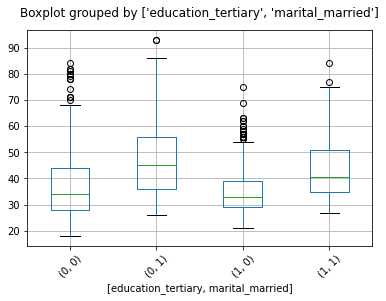

In [209]:
df.boxplot(column='age', by=['education_tertiary','marital_married'], rot=45)
plt.title("")
plt.show()

As visible from the above plot, there is a varying difference between the **medians** of `age` and so we will use these medians to fill in the missing data points.

In [210]:
ptable = df.pivot_table(values='age', 
                        index='education_tertiary',
                        columns='marital_married',  
                        aggfunc=np.median)
ptable

marital_married,0,1
education_tertiary,,
0,34.0,45.0
1,33.0,40.5


From the above pivot table we can see precisely the median values of age for the different scenarios in `education_tertiary`, combined with `marital_married`.

In [211]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['education_tertiary'], x['marital_married']]

# Replace missing age values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

The reason behind choosing this method to replace missing values and not a simpler method is because of the use of i.e. **median**, **mean**, etc. can possibly introduce **bias** into the data.

## Part 3: Apply a Scaler to Rescale Features

For all the attibutes which we have performed **encoding** and **one-hot encoding** for we do not need to apply a scaler to rescale the features. This is because:
- The encoded months and days have been replaced with cos and sin features and are in the range [-1 - 1]
- The one-hot encoded attributes have been replaced by 0's and 1's to signify the presence of their features and so are in the range [0 - 1].

For the remaining features `age`, `balance`, `duration`, `campaign`, `previous` and `pdays` it is necessary for us to plot the distribution of the data of these variables to show:
- **Outliers**.
- Whether they need **rescaling**.

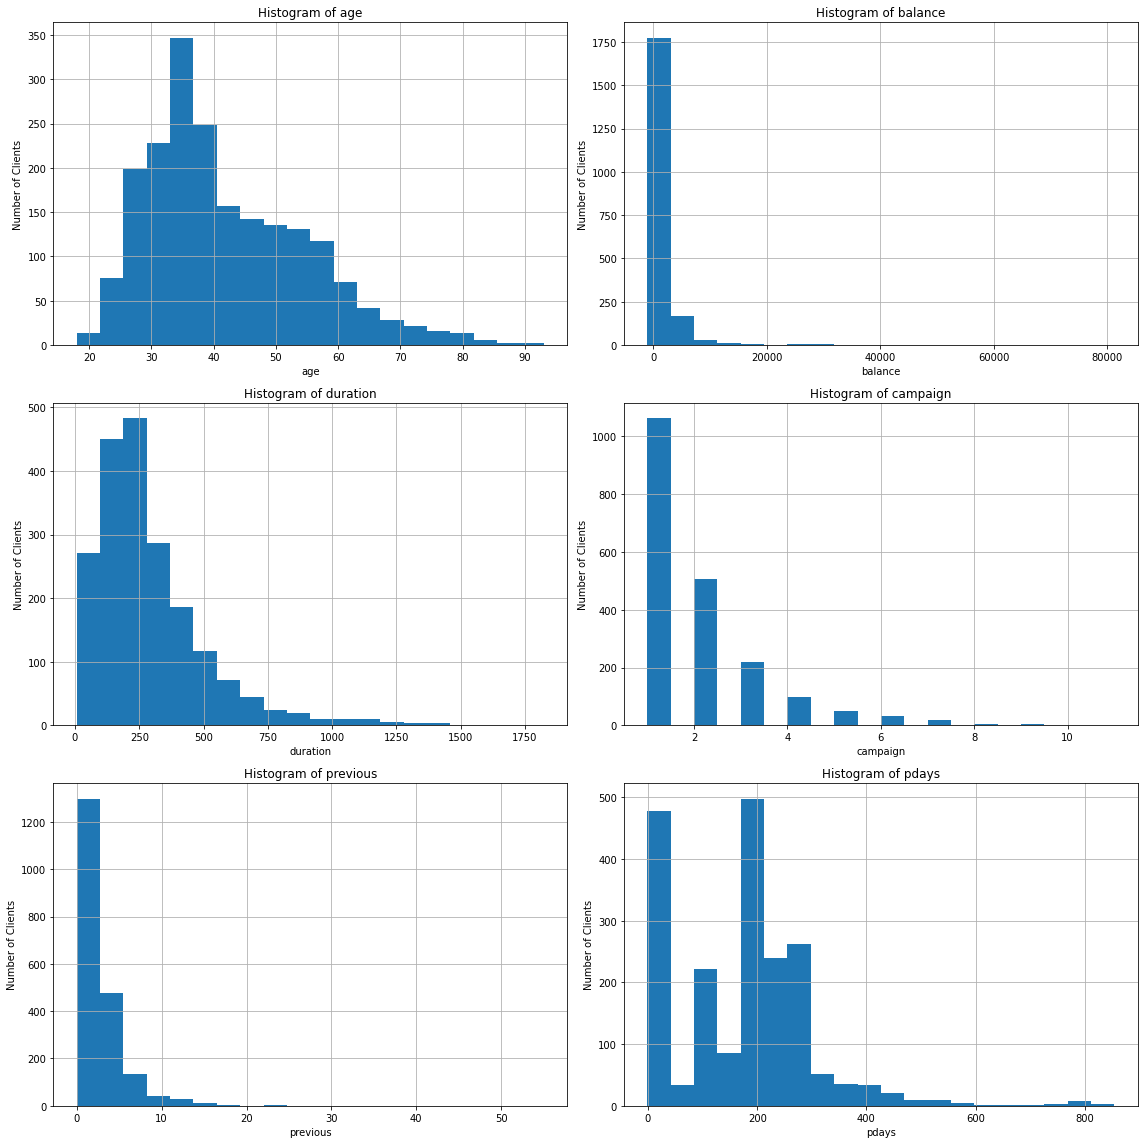

In [212]:
# Create figure with 6 subplots
fig = plt.figure(figsize=(16,16))

# Plot age
ax1 = fig.add_subplot(3, 2, 1)
ax1.set_title("Histogram of age")
ax1.set_xlabel('age')
ax1.set_ylabel('Number of Clients')
df['age'].hist(bins=20)

# Plot balance
ax2 = fig.add_subplot(3, 2, 2)
ax2.set_title("Histogram of balance")
ax2.set_xlabel('balance')
ax2.set_ylabel('Number of Clients')
df['balance'].hist(bins=20)

# Plot duration
ax3 = fig.add_subplot(3, 2, 3)
ax3.set_title("Histogram of duration")
ax3.set_xlabel('duration')
ax3.set_ylabel('Number of Clients')
df['duration'].hist(bins=20)

# Plot campaign
ax4 = fig.add_subplot(3, 2, 4)
ax4.set_title("Histogram of campaign")
ax4.set_xlabel('campaign')
ax4.set_ylabel('Number of Clients')
df['campaign'].hist(bins=20)

# Plot previous
ax5 = fig.add_subplot(3, 2, 5)
ax5.set_title("Histogram of previous")
ax5.set_xlabel('previous')
ax5.set_ylabel('Number of Clients')
df['previous'].hist(bins=20)

# Plot pdays
ax6 = fig.add_subplot(3, 2, 6)
ax6.set_title("Histogram of pdays")
ax6.set_xlabel('pdays')
ax6.set_ylabel('Number of Clients')
df['pdays'].hist(bins=20)

fig.tight_layout()

plt.show()

From viewing the above plots we can see that `campaign` and `balance` follow more of a normal distribution with little to no **outliers**. These features are suited to be scaled by using the **standard scaler** as it can center the data by using the **mean** and **standard deviation** (which has not been affected by **outliers**.

In [213]:
# Use a standard scaler to scale attributes evenly distributed
scaler = StandardScaler()
df[['campaign','age']] = scaler.fit_transform(df[['campaign','age']])

Also from viewing the above plots we can see that `balance`, `previous`, `pdays` and `duration` all contain **outliers**. Due to these features containing outliers the **minmax** or **standard scalers** are not suited to them, as the outliers would end up being on the boundaries with the rest of the data lying in a small range. The solution is to use a **robust scaler** as it is more suited to **outliers**.

In [214]:
# Use a robust scaler to scale attributes with outliers
robust_scaler = RobustScaler()
df[['balance','previous','pdays', 'duration']] = robust_scaler.fit_transform(df[['balance','previous','pdays', 'duration']])

## Part 4: Treated Outliers Appropriately

As seen in the previous section `pdays`, `duration`, `balance` and `previous` are the attributes with the most extreme amount of outliers and the robust scaler was used on them. We must once more verify this claim and if true treat the outliers appropriately.

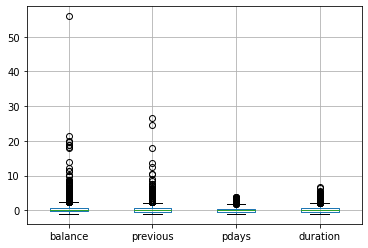

In [215]:
# Box plot of balance and previous
df.boxplot(column=['balance','previous', 'pdays', 'duration'])
plt.show()

As we can see from the above boxplot these features do have many outliers.

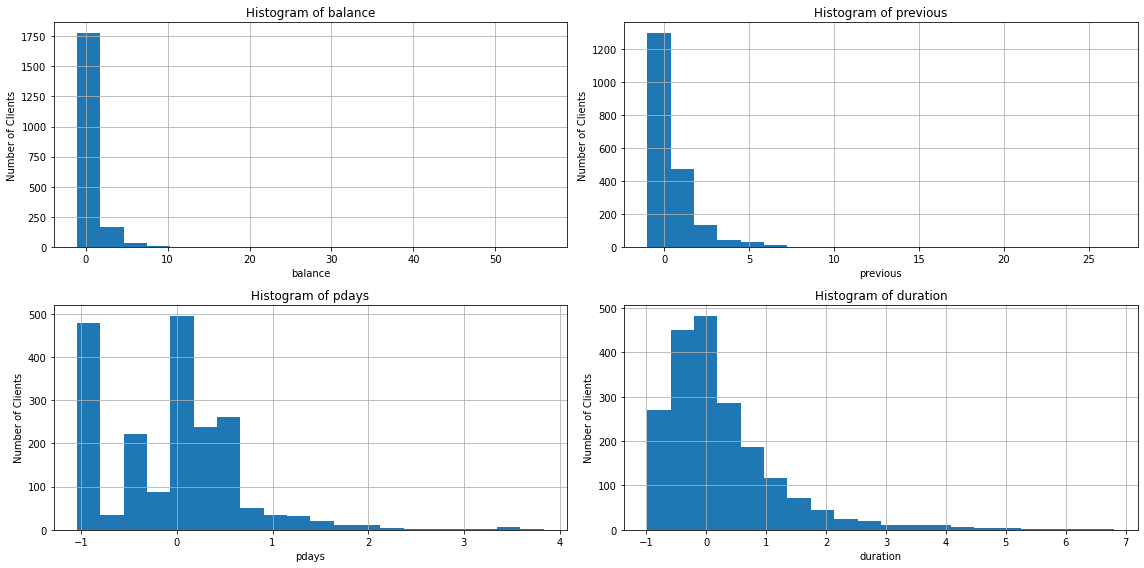

In [216]:
# Create figure with four subplots
fig = plt.figure(figsize=(16,8))

# Plot balance
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Clients')
df['balance'].hist(bins=20)

# Plot previous
ax3 = fig.add_subplot(2, 2, 2)
ax3.set_title("Histogram of previous")
ax3.set_xlabel('previous')
ax3.set_ylabel('Number of Clients')
df['previous'].hist(bins=20)

# Plot pdays
ax2 = fig.add_subplot(2, 2, 3)
ax2.set_title("Histogram of pdays")
ax2.set_xlabel('pdays')
ax2.set_ylabel('Number of Clients')
df['pdays'].hist(bins=20)

# Plot duration
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title("Histogram of duration")
ax4.set_xlabel('duration')
ax4.set_ylabel('Number of Clients')
df['duration'].hist(bins=20)

fig.tight_layout()
plt.show()

The above histograms shows that the attributes are left skewed and also backs up our earlier statements about the presence of outliers.

In [217]:
df[['balance', 'previous', 'pdays', 'duration']].min()

balance    -1.060984
previous   -1.000000
pdays      -1.044223
duration   -0.982833
dtype: float64

The attributes also contain negative values. Before we apply a log function to treat outliers we must also shift them to the right to get rid of negative values.

In [218]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+2.07)
df['previous'] = np.log(df['previous']+2)
df['pdays'] = np.log(df['pdays']+2.044223)
df['duration'] = np.log(df['duration']+1.99)

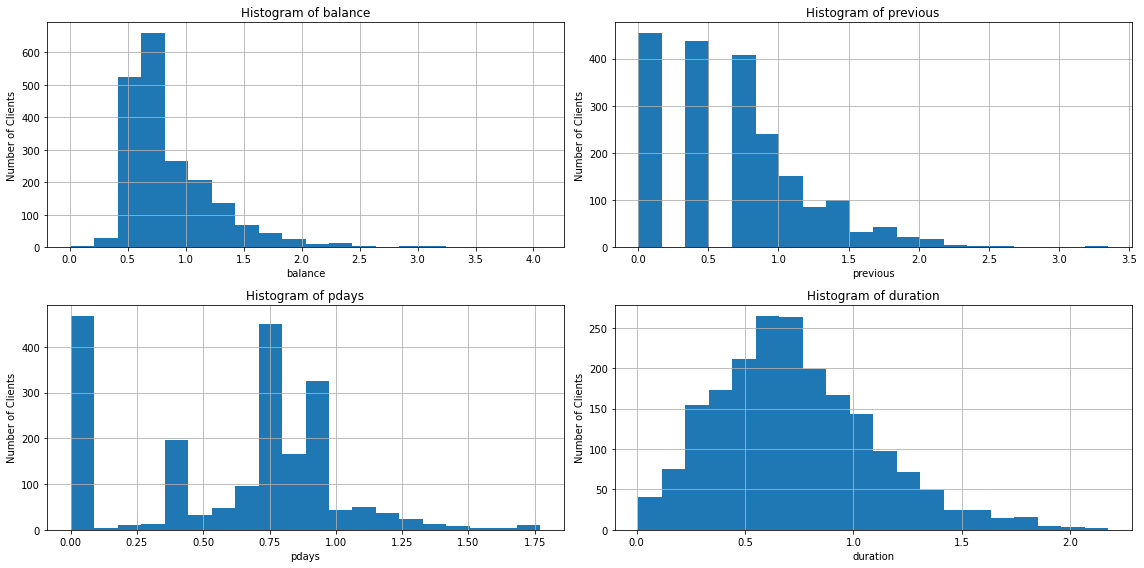

In [219]:
# Create figure with four subplots
fig = plt.figure(figsize=(16,8))

# Plot balance
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Clients')
df['balance'].hist(bins=20)

# Plot previous
ax3 = fig.add_subplot(2, 2, 2)
ax3.set_title("Histogram of previous")
ax3.set_xlabel('previous')
ax3.set_ylabel('Number of Clients')
df['previous'].hist(bins=20)

# Plot pdays
ax2 = fig.add_subplot(2, 2, 3)
ax2.set_title("Histogram of pdays")
ax2.set_xlabel('pdays')
ax2.set_ylabel('Number of Clients')
df['pdays'].hist(bins=20)

# Plot duration
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title("Histogram of duration")
ax4.set_xlabel('duration')
ax4.set_ylabel('Number of Clients')
df['duration'].hist(bins=20)

fig.tight_layout()
plt.show()

As we can see from the above histograms, `pdays`, `duration`, `balance` and `previous` now have a more even distribution (closer to normal distribution) and also are less skewed.

It is important to notice the amount of data that lies at 0.00 for `pdays`. Originally people who were not previously contacted and were new clients would have a -1 value for pdays. Now due to rescaling and shifting, these -1 values are now sitting at 0.00. So the high number at 0 for pdays are people who have not been previously contacted.

## Part 5: Creation of New Features

#### New Client

To correctly portray the information mentioned above I think that the creation of a new feature to determine whether a person is a new client or not is necessary. For this:
- 1 will represent a new client.
- 0 will represent a previous client.

To derive the values for this new feature (`newClient`) we will look at `pdays` in the original dataframe. If `pdays` = -1 for a row then they are a new client, else they are a previous client.

In [220]:
def label_client(row):
    if row['pdays'] == -1:
        return 1
    else:
        return 0

In [221]:
df['newClient'] = df_original.apply(lambda row: label_client(row), axis=1)

In [225]:
df['newClient'].value_counts()

0    1546
1     454
Name: newClient, dtype: int64

As we can see from the above cell, 454 of the clients are new clients.

#### Total Contact

The `previous` attribute contains many zeros as clients have not been previously contacted. This skews the data towards 0 and cannot be easily fixed with a log transformation.

What can be done is:
- We can create a new feature `totalContact` which is the sum of the contact for this `campaign` and `previous` campaigns.
- We can then drop the `previous` feature as it can be derived from `totalContact` - `campaign`.

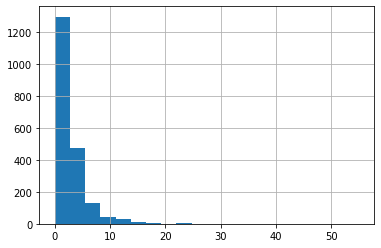

In [165]:
# Plot original previous
df_original['previous'].hist(bins=20)
plt.show()

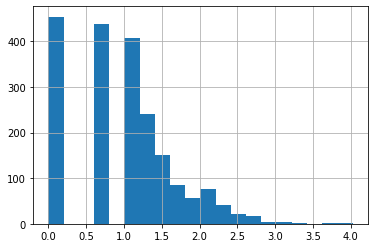

In [166]:
# Use a log function to show log skew
np.log(df_original['previous']+1).hist(bins=20)
plt.show()

In [167]:
# Create TotalContact column and apply a log transformation
df['TotalContact'] = df_original['previous'] + df_original['campaign']
df[['TotalContact']] = robust_scaler.fit_transform(df[['TotalContact']])

# Get the min value so we can shift right by that value
df[['TotalContact']].min()

TotalContact   -0.666667
dtype: float64

In [168]:
# Apply a log transformation to take care of any outliers
df['TotalContact'] = np.log(df['TotalContact']+1.67)

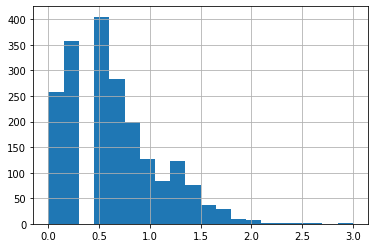

In [169]:
# Plot a histogram of TotalContact
df['TotalContact'].hist(bins=20)
plt.show()

#### Cos and Sin of Month and Day

As mentioned earlier the months of the year can be considered cyclic data (December - 12, leads to January - 1) and so can the days of the week so we will create new attributes for the sin and cos of these attributes to better represent their relationships.

In [170]:
# Create a sin and cos feature for month
df['Sin_Month'] = np.sin(2 * np.pi * df['month'] / max(df['month'])) 
df['Cos_Month'] = np.cos(2 * np.pi * df['month'] / max(df['month']))

# Create a sin and cos feature for day
df['Sin_day'] = np.sin(2 * np.pi * df['day'] / max(df['day'])) 
df['Cos_day'] = np.cos(2 * np.pi * df['day'] / max(df['day']))

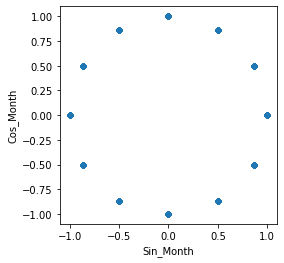

In [171]:
# Scatter plot of Sin_Month and Cos_Month
df.plot.scatter('Sin_Month', 'Cos_Month').set_aspect('equal')

The above graph shows the new cyclical relationship between `Sin_Month` and `Cos_Month`.

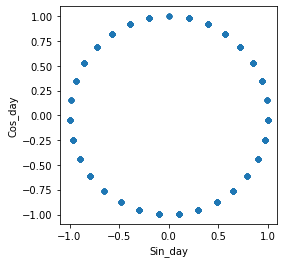

In [172]:
# Scatter plot of Sin_day and Cos_day
df.plot.scatter('Sin_day', 'Cos_day').set_aspect('equal')

The above graph shows the new cyclical relationship between `Sin_day` and `Cos_day`.

In [173]:
# Drop the old previous column
df.drop('previous', axis=1, inplace=True)

# Drop the old month and day columns
df.drop('month', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)
df.tail()

,age,balance,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,TotalContact,Sin_Month,Cos_Month,Sin_day,Cos_day
1995,-1.713144,1.285967,0.867335,0.065650,4.607702e-07,0,0,0,0,0,...,1,0,0,0,1,0.290179,-1.0,-1.836970e-16,-0.101168,-0.994869
1996,-1.082682,0.574458,1.902473,0.065650,4.607702e-07,0,0,0,0,0,...,1,0,0,0,1,0.290179,-1.0,-1.836970e-16,-0.101168,-0.994869
1997,3.094133,0.911431,0.677293,-0.659767,4.607702e-07,0,0,0,0,1,...,0,0,0,0,1,0.003328,-1.0,-1.836970e-16,-0.299363,-0.954139
1998,0.335859,1.547107,0.571610,-0.659767,4.607702e-07,0,0,0,0,0,...,0,0,1,0,1,0.003328,-1.0,-1.836970e-16,-0.790776,-0.612106
1999,-0.136988,1.812451,0.625847,0.065650,4.607702e-07,0,1,0,0,0,...,0,0,0,0,1,0.290179,-1.0,-1.836970e-16,-0.968077,-0.250653


Drop all the old columns as they are no longer needed

#### Save CSV

In [174]:
df.to_csv('bank_prepared.csv')

Output the prepared dataset which can be used further for data mining processes and for the submission of etivity 2. 